In [1]:
########################## ZHUANG ASTROCYTE ANALYSIS ##########################
############################### C&S BIO 199 ###################################
################################# JAMES FU ###############3####################

In [85]:
from scipy import stats
from scipy.stats import ttest_ind
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/jamesfu/miniforge3/envs/jupyter/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 pynndescent==0.5.10


In [4]:
# f1 = 'cell_metadata.csv'
# f2 = 'ccf_coordinates.csv'

# df1 = pd.read_csv(f1)
# df2 = pd.read_csv(f2)

In [5]:
download_base = 'metadata'

# Sample 1
folder_1 = os.path.join(download_base, '1')
file_path_1 = os.path.join(folder_1, 'cell_metadata_with_cluster_annotation.csv')
if os.path.exists(file_path_1):
    df1 = pd.read_csv(file_path_1, index_col=0)
    # Process df1 as needed
# Sample 2
folder_2 = os.path.join(download_base, '2')
file_path_2 = os.path.join(folder_2, 'cell_metadata_with_cluster_annotation.csv')
if os.path.exists(file_path_2):
    df2 = pd.read_csv(file_path_2, index_col=0)
    # Process df2 as needed
# Sample 3
folder_3 = os.path.join(download_base, '3')
file_path_3 = os.path.join(folder_3, 'cell_metadata_with_cluster_annotation.csv')
if os.path.exists(file_path_3):
    df3 = pd.read_csv(file_path_3, index_col=0)
    # Process df3 as needed
# Sample 4
folder_4 = os.path.join(download_base, '4')
file_path_4 = os.path.join(folder_4, 'cell_metadata_with_cluster_annotation.csv')
if os.path.exists(file_path_4):
    df4 = pd.read_csv(file_path_4, index_col=0)
    # Process df4 as needed

In [6]:
df1

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
182941331246012878296807398333956011710,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,704,0.682522,3.366483,7.829530,0.969933,...,GABA,06 CTX-CGE GABA,049 Lamp5 Gaba,0199 Lamp5 Gaba_1,0709 Lamp5 Gaba_1,#FF3358,#CCFF33,#FF764D,#DC00FF,#998900
221260934538535633595532020856387724686,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5243,0.667690,3.442241,7.829530,0.850554,...,NaN,33 Vascular,331 Peri NN,1191 Peri NN_1,5304 Peri NN_1,#666666,#858881,#82992E,#2F00CC,#BB1FCC
22228792606814781533240955623030943708,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.638731,3.474328,7.829530,0.888285,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
272043042552227961220474294517855477150,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.653425,3.433218,7.829530,0.900000,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
110116287883089187971185374239350249328,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5254,0.623896,3.513574,7.829530,0.999978,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94310525370042131911495836073267655162,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5255,0.997247,3.823236,9.717769,0.971385,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5311 Endo NN_1,#666666,#858881,#994567,#00992A,#CC3D76
298798481479578578007190103666214714353,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.043871,3.706231,9.717769,0.956377,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
330756942354980576352210203729462562749,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5261,1.037680,3.759890,9.717769,0.811520,...,NaN,33 Vascular,330 VLMC NN,1188 VLMC NN_2,5301 VLMC NN_2,#666666,#858881,#653D66,#4D5CFF,#79CC5C


In [7]:
df2

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
212059428959805613780123472670405935608,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5231,5.337579,6.644862,6.386148,0.894903,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5285 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5A662E
101833224400913170993812156276156584394,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,2071,5.863014,6.462386,6.386148,0.999995,...,Glut,14 HY Glut,129 VMH Nr5a1 Glut,0566 VMH Nr5a1 Glut_1,2302 VMH Nr5a1 Glut_1,#2B93DF,#AA0DFE,#5CCCB1,#C75CCC,#17996C
116669018306856876830982739516818207276,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5231,5.849021,6.484391,6.386148,0.999976,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5285 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5A662E
121694682702834895895365823691785670763,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5203,5.915538,6.599683,6.386148,0.999975,...,NaN,31 OPC-Oligo,326 OPC NN,1179 OPC NN_1,5269 OPC NN_1,#666666,#03045E,#FF26CB,#CC0049,#5C997B
185976042007724647428195739176352638262,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5283,5.908972,6.518780,6.386148,0.999991,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86001983834985959840814361378079899640,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5231,1.916655,3.126491,10.756805,0.840626,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5285 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5A662E
93795515150229058753415938088013639815,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,4167,1.973292,3.180199,10.756805,0.994040,...,GABA,28 CB GABA,311 CBX MLI Megf11 Gaba,1149 CBX MLI Megf11 Gaba_1,5188 CBX MLI Megf11 Gaba_1,#FF3358,#FFFB46,#8BCC5C,#246600,#4F2E66
150978925708991048176246165426561402843,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5256,1.989350,3.041338,10.756805,0.903833,...,NaN,33 Vascular,329 ABC NN,1186 ABC NN_1,5293 ABC NN_1,#666666,#858881,#CC5CC1,#553D66,#00C6CC


In [8]:
df3

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.128755,4.752046,1.230645,0.986932,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.112333,4.745410,1.230645,0.928555,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5261,5.101224,4.722090,1.230645,0.921832,...,NaN,33 Vascular,330 VLMC NN,1188 VLMC NN_2,5301 VLMC NN_2,#666666,#858881,#653D66,#4D5CFF,#79CC5C
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5258,5.105775,4.707346,1.230645,0.905368,...,NaN,33 Vascular,329 ABC NN,1186 ABC NN_1,5295 ABC NN_1,#666666,#858881,#CC5CC1,#553D66,#26FFE8
131102494428104399865219008178262036485,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5283,5.086307,4.569099,1.230645,0.999984,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55192919491987647587752432952753516310,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5230,13.985773,6.493858,3.879380,0.999992,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5284 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5B2E66
5527365782112282574301502877997182927,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,4222,13.986354,6.576636,3.879380,0.942936,...,Glut,24 MY Glut,245 SPVI-SPVC Tlx3 Ebf3 Glut,0983 SPVI-SPVC Tlx3 Ebf3 Glut_3,4427 SPVI-SPVC Tlx3 Ebf3 Glut_3,#2B93DF,#F0A0FF,#84CC3D,#C30000,#00FFD7
83562102707459388461009705694939129976,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,4333,13.995562,6.578075,3.879380,0.998942,...,Glut,24 MY Glut,257 SPVC Ccdc172 Glut,1020 SPVC Ccdc172 Glut_1,4579 SPVC Ccdc172 Glut_1,#2B93DF,#F0A0FF,#580099,#179985,#AF3DCC


In [9]:
df4

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
177536119734259275144748435471942472531,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5249,12.845605,3.428535,1.958952,0.998365,...,NaN,33 Vascular,332 SMC NN,1192 SMC NN_1,5307 SMC NN_1,#666666,#858881,#FF9F73,#FF8F73,#009945
256532006537596385088807329967308781746,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,4167,12.854068,3.466185,1.958952,0.928926,...,GABA,28 CB GABA,311 CBX MLI Megf11 Gaba,1149 CBX MLI Megf11 Gaba_1,5188 CBX MLI Megf11 Gaba_1,#FF3358,#FFFB46,#8BCC5C,#246600,#4F2E66
28801318882950773770397006451868070066,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5252,12.828245,3.409277,1.958952,0.963517,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
301971869963235435117242882149875853185,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5252,12.827268,3.403092,1.958952,0.999984,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
81203938259029510162263594992098070595,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5249,12.828462,3.410416,1.958952,0.999948,...,NaN,33 Vascular,332 SMC NN,1192 SMC NN_1,5307 SMC NN_1,#666666,#858881,#FF9F73,#FF8F73,#009945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207078638049612663505414491993744973724,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5283,3.631468,4.047762,1.780537,0.999987,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
269688622729976403473132483008812650057,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5283,3.626968,3.951028,1.780537,0.805506,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
32317399564312907213846667957826182632,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5254,3.642379,3.875565,1.780537,0.997058,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473


In [10]:
# df_astro will contain just astrocyte objects
df_astro_1 = df1[df1['class'] == '30 Astro-Epen']
df_astro_2 = df2[df2['class'] == '30 Astro-Epen']
df_astro_3 = df3[df3['class'] == '30 Astro-Epen']
df_astro_4 = df4[df4['class'] == '30 Astro-Epen']
# df_astro = df_astro.head(10000)
# df_astro.shape

In [11]:
df_astro_1

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
22228792606814781533240955623030943708,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.638731,3.474328,7.829530,0.888285,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
272043042552227961220474294517855477150,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.653425,3.433218,7.829530,0.900000,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
133529526547955128870747361202131334625,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.699356,3.615738,7.829530,0.999957,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
245945371086686768587266749390128605629,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.684533,3.510710,7.829530,0.999972,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
339162789817875791957310179152470432940,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.663436,3.648338,7.829530,0.902181,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201205619770430534580208526440582837295,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.194271,4.201440,9.717769,0.999952,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
32805747105259496927227627060297400522,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.194030,4.250746,9.717769,0.857730,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
337907874495742963056269453718017827935,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.249539,4.270894,9.717769,0.999979,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799


In [12]:
df_astro_2

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
42665924357996041937950729801092620955,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.883672,6.486608,6.386148,0.994062,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
83227503742700355553370874122986036334,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.879596,6.489284,6.386148,0.999983,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
112159048783846751834660349005255670299,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.671231,6.560481,6.386148,0.997949,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
117512623344764235564689549736303105901,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.763481,6.443666,6.386148,0.976011,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
126408426972928049529890634682551621545,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.827187,6.537789,6.386148,0.999977,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147061329316624840406495801839060485621,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14873,2.133472,4.542224,10.756805,0.999379,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
305314207177950723917752960569604524875,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14873,1.994124,3.710922,10.756805,0.979094,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
182120145879607225805637020747033610105,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14873,1.998572,3.502079,10.756805,0.999985,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99


In [13]:
df_astro_3

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
298963205158997791883777777743669060538,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14939,5.090091,4.279553,1.230645,0.999982,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
129072516415352811934477266798578722869,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14926,5.256916,3.703485,1.230645,0.999968,...,NaN,30 Astro-Epen,319 Astro-TE NN,1161 Astro-TE NN_1,5218 Astro-TE NN_1,#666666,#594a26,#3DCCB1,#FFB173,#862E99
280117930068277871591229959494483649577,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14926,5.236355,3.794198,1.230645,0.999963,...,NaN,30 Astro-Epen,319 Astro-TE NN,1161 Astro-TE NN_1,5218 Astro-TE NN_1,#666666,#594a26,#3DCCB1,#FFB173,#862E99
58952508702286764928984940302499971608,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14939,5.250526,3.715283,1.230645,0.839862,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
204004724700804513431472979574482560198,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14939,5.210831,4.014118,1.230645,0.999950,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309265933477000656165726312323599861923,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14956,14.011443,6.248728,3.879380,0.999972,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
102689362717660293905003921387910646580,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14965,14.001147,6.451430,3.879380,0.999996,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5216 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#3D5366
129629766946790396674208527509945357999,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14956,13.996652,6.536839,3.879380,0.805915,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF


In [14]:
df_astro_4

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
140747011267892582905309268669425422853,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.830089,3.824087,1.958952,0.994736,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
63246407543992658237913863167787035289,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.835460,3.938372,1.958952,0.999932,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
97471305585084152981124093092587504464,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.830686,3.891988,1.958952,0.999969,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
221594875107838233085527568101040718914,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.660252,4.315695,1.958952,0.999988,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
261814376744194856506575318155876699437,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.616478,4.379493,1.958952,0.999980,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268235453160318605896265105649328592594,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14939,3.753773,4.346687,1.780537,0.999979,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
61443411767331655204121196204981923121,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14939,3.807133,4.330839,1.780537,0.999959,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
151427869553953572114157344732918193466,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14939,3.800603,4.558003,1.780537,0.999974,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799


In [15]:
# df_gen will contain everything not astrocyte
# fixed 11/20
df_gen_1 = df1[df1['class'] != '30 Astro-Epen']
df_gen_2 = df2[df2['class'] != '30 Astro-Epen']
df_gen_3 = df3[df3['class'] != '30 Astro-Epen']
df_gen_4 = df4[df4['class'] != '30 Astro-Epen']
# df_gen = df_gen.head(10000)

In [16]:
df_gen_1

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
182941331246012878296807398333956011710,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,704,0.682522,3.366483,7.829530,0.969933,...,GABA,06 CTX-CGE GABA,049 Lamp5 Gaba,0199 Lamp5 Gaba_1,0709 Lamp5 Gaba_1,#FF3358,#CCFF33,#FF764D,#DC00FF,#998900
221260934538535633595532020856387724686,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5243,0.667690,3.442241,7.829530,0.850554,...,NaN,33 Vascular,331 Peri NN,1191 Peri NN_1,5304 Peri NN_1,#666666,#858881,#82992E,#2F00CC,#BB1FCC
110116287883089187971185374239350249328,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5254,0.623896,3.513574,7.829530,0.999978,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473
137910993561966678865331065719080754740,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5254,0.605255,3.569785,7.829530,0.994432,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473
162796414422771027844640234303240756273,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5254,0.662724,3.573281,7.829530,0.837312,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106443312702237931166335132213271159,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5260,1.011309,3.827708,9.717769,0.942657,...,NaN,33 Vascular,330 VLMC NN,1187 VLMC NN_1,5297 VLMC NN_1,#666666,#858881,#653D66,#66391F,#660F4A
94310525370042131911495836073267655162,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5255,0.997247,3.823236,9.717769,0.971385,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5311 Endo NN_1,#666666,#858881,#994567,#00992A,#CC3D76
330756942354980576352210203729462562749,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5261,1.037680,3.759890,9.717769,0.811520,...,NaN,33 Vascular,330 VLMC NN,1188 VLMC NN_2,5301 VLMC NN_2,#666666,#858881,#653D66,#4D5CFF,#79CC5C


In [17]:
df_gen_2

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
212059428959805613780123472670405935608,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5231,5.337579,6.644862,6.386148,0.894903,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5285 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5A662E
101833224400913170993812156276156584394,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,2071,5.863014,6.462386,6.386148,0.999995,...,Glut,14 HY Glut,129 VMH Nr5a1 Glut,0566 VMH Nr5a1 Glut_1,2302 VMH Nr5a1 Glut_1,#2B93DF,#AA0DFE,#5CCCB1,#C75CCC,#17996C
116669018306856876830982739516818207276,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5231,5.849021,6.484391,6.386148,0.999976,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5285 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5A662E
121694682702834895895365823691785670763,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5203,5.915538,6.599683,6.386148,0.999975,...,NaN,31 OPC-Oligo,326 OPC NN,1179 OPC NN_1,5269 OPC NN_1,#666666,#03045E,#FF26CB,#CC0049,#5C997B
185976042007724647428195739176352638262,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5283,5.908972,6.518780,6.386148,0.999991,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86001983834985959840814361378079899640,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5231,1.916655,3.126491,10.756805,0.840626,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5285 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5A662E
93795515150229058753415938088013639815,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,4167,1.973292,3.180199,10.756805,0.994040,...,GABA,28 CB GABA,311 CBX MLI Megf11 Gaba,1149 CBX MLI Megf11 Gaba_1,5188 CBX MLI Megf11 Gaba_1,#FF3358,#FFFB46,#8BCC5C,#246600,#4F2E66
150978925708991048176246165426561402843,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,5256,1.989350,3.041338,10.756805,0.903833,...,NaN,33 Vascular,329 ABC NN,1186 ABC NN_1,5293 ABC NN_1,#666666,#858881,#CC5CC1,#553D66,#00C6CC


In [18]:
df_gen_3

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.128755,4.752046,1.230645,0.986932,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.112333,4.745410,1.230645,0.928555,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5261,5.101224,4.722090,1.230645,0.921832,...,NaN,33 Vascular,330 VLMC NN,1188 VLMC NN_2,5301 VLMC NN_2,#666666,#858881,#653D66,#4D5CFF,#79CC5C
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5258,5.105775,4.707346,1.230645,0.905368,...,NaN,33 Vascular,329 ABC NN,1186 ABC NN_1,5295 ABC NN_1,#666666,#858881,#CC5CC1,#553D66,#26FFE8
131102494428104399865219008178262036485,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5283,5.086307,4.569099,1.230645,0.999984,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317443949654463083354176231297510292647,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,4203,13.955077,6.460048,3.879380,0.999997,...,GABA-Glyc,27 MY GABA,305 SPVI-SPVC Sall3 Nfib Gly-Gaba,1136 SPVI-SPVC Sall3 Nfib Gly-Gaba_1,5134 SPVI-SPVC Sall3 Nfib Gly-Gaba_1,#820e57,#0096C7,#66140F,#663D65,#92992E
55192919491987647587752432952753516310,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5230,13.985773,6.493858,3.879380,0.999992,...,NaN,31 OPC-Oligo,327 Oligo NN,1184 MOL NN_4,5284 MOL NN_4,#666666,#03045E,#99FFBC,#371FCC,#5B2E66
5527365782112282574301502877997182927,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,4222,13.986354,6.576636,3.879380,0.942936,...,Glut,24 MY Glut,245 SPVI-SPVC Tlx3 Ebf3 Glut,0983 SPVI-SPVC Tlx3 Ebf3 Glut_3,4427 SPVI-SPVC Tlx3 Ebf3 Glut_3,#2B93DF,#F0A0FF,#84CC3D,#C30000,#00FFD7


In [19]:
df_gen_4

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
177536119734259275144748435471942472531,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5249,12.845605,3.428535,1.958952,0.998365,...,NaN,33 Vascular,332 SMC NN,1192 SMC NN_1,5307 SMC NN_1,#666666,#858881,#FF9F73,#FF8F73,#009945
256532006537596385088807329967308781746,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,4167,12.854068,3.466185,1.958952,0.928926,...,GABA,28 CB GABA,311 CBX MLI Megf11 Gaba,1149 CBX MLI Megf11 Gaba_1,5188 CBX MLI Megf11 Gaba_1,#FF3358,#FFFB46,#8BCC5C,#246600,#4F2E66
28801318882950773770397006451868070066,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5252,12.828245,3.409277,1.958952,0.963517,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
301971869963235435117242882149875853185,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5252,12.827268,3.403092,1.958952,0.999984,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
81203938259029510162263594992098070595,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5249,12.828462,3.410416,1.958952,0.999948,...,NaN,33 Vascular,332 SMC NN,1192 SMC NN_1,5307 SMC NN_1,#666666,#858881,#FF9F73,#FF8F73,#009945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207078638049612663505414491993744973724,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5283,3.631468,4.047762,1.780537,0.999987,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
269688622729976403473132483008812650057,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5283,3.626968,3.951028,1.780537,0.805506,...,NaN,34 Immune,334 Microglia NN,1194 Microglia NN_1,5312 Microglia NN_1,#666666,#825f45,#CC1F4E,#62CC3D,#651FCC
32317399564312907213846667957826182632,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,5254,3.642379,3.875565,1.780537,0.997058,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473


In [20]:
%%time
# filepath stuffs
download_base = 'adata'
results_file_1 = os.path.join(download_base, 'Zhuang-ABCA-1-raw.h5ad')
results_file_2 = os.path.join(download_base, 'Zhuang-ABCA-2-raw.h5ad')
results_file_3 = os.path.join(download_base, 'Zhuang-ABCA-3-raw.h5ad')
results_file_4 = os.path.join(download_base, 'Zhuang-ABCA-4-raw.h5ad')
# read in anndata objects
adata_1 = anndata.read_h5ad(results_file_1) # too large to work with entire h5ad file update: should be fine
adata_2 = anndata.read_h5ad(results_file_2)
adata_3 = anndata.read_h5ad(results_file_3)
adata_4 = anndata.read_h5ad(results_file_4)

CPU times: user 2min 46s, sys: 46.7 s, total: 3min 32s
Wall time: 5min 30s


In [21]:
print(adata_1.obs_keys())
# print(df.columns)
adata_1.var

['brain_section_label']


,gene_symbol
gene_identifier,
ENSMUSG00000024798,Htr7
ENSMUSG00000042385,Gzmk
ENSMUSG00000036198,Arhgap36
ENSMUSG00000028780,Sema3c
ENSMUSG00000015843,Rxrg
...,...
ENSMUSG00000015619,Gata3
ENSMUSG00000070047,Fat1
ENSMUSG00000002266,Zim1


In [22]:
print(adata_2.obs_keys())
adata_2.var

['brain_section_label']


,gene_symbol
gene_identifier,
ENSMUSG00000024798,Htr7
ENSMUSG00000042385,Gzmk
ENSMUSG00000036198,Arhgap36
ENSMUSG00000028780,Sema3c
ENSMUSG00000015843,Rxrg
...,...
ENSMUSG00000015619,Gata3
ENSMUSG00000070047,Fat1
ENSMUSG00000002266,Zim1


In [23]:
print(adata_3.obs_keys())
adata_3.var

['brain_section_label']


,gene_symbol
gene_identifier,
ENSMUSG00000024798,Htr7
ENSMUSG00000042385,Gzmk
ENSMUSG00000036198,Arhgap36
ENSMUSG00000028780,Sema3c
ENSMUSG00000015843,Rxrg
...,...
ENSMUSG00000015619,Gata3
ENSMUSG00000070047,Fat1
ENSMUSG00000002266,Zim1


In [24]:
print(adata_4.obs_keys())
adata_4.var

['brain_section_label']


,gene_symbol
gene_identifier,
ENSMUSG00000024798,Htr7
ENSMUSG00000042385,Gzmk
ENSMUSG00000036198,Arhgap36
ENSMUSG00000028780,Sema3c
ENSMUSG00000015843,Rxrg
...,...
ENSMUSG00000015619,Gata3
ENSMUSG00000070047,Fat1
ENSMUSG00000002266,Zim1


In [25]:
list1_1 = df_astro_1.index

In [26]:
list1_2 = df_astro_2.index

In [27]:
list1_3 = df_astro_3.index

In [28]:
list1_4 = df_astro_4.index

In [29]:
list2_1 = adata_1.obs.index

In [30]:
list2_2 = adata_2.obs.index

In [31]:
list2_3 = adata_3.obs.index

In [32]:
list2_4 = adata_4.obs.index

In [33]:
# check the shape for the first sample
list3_1 = np.intersect1d(list1_1, list2_1)
list3_1.shape

(414855,)

In [34]:
# check the shape for the second sample
list3_2 = np.intersect1d(list1_2, list2_2)
list3_2.shape

(181104,)

In [35]:
# check the shape for the third sample
list3_3 = np.intersect1d(list1_3, list2_3)
list3_3.shape

(200334,)

In [36]:
# check the shape for the fourth sample
list3_4 = np.intersect1d(list1_4, list2_4)
list3_4.shape

(19157,)

In [37]:
####################### merging all the data for the first sample #######################

# merging the data serparately causes the kernel to crash
# try to merge ALL of the data (adata_1) now? not sure
# think this is better
# note: probably need to take a subset of data again similar to above

# creates a new dataframe? (adata_3) by selecting only the rows of adata_1.obs that have indices matching the indices of df_astro
# merges adata_3.obs and df_astro data frames using the .merge() method on the indices
adata_3_1 = adata_1[adata_1.obs.loc[df_astro_1.index].index]
adata_4_1 = adata_1[adata_1.obs.loc[df_gen_1.index].index]
# adata_3
# temp, or resulting dataframe is just a merged dataframe, how to get merfish data from this?
temp_sample_1 = adata_3_1.obs.merge(df_astro_1, left_index=True, right_index=True, how='left')
temp_sample_1
# merged_data = pd.merge(adata_1.obs, brain_section_label, left_index=True, right_index=True)

,brain_section_label_x,brain_section_label_y,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
22228792606814781533240955623030943708,Zhuang-ABCA-1.089,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.638731,3.474328,7.829530,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
272043042552227961220474294517855477150,Zhuang-ABCA-1.089,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.653425,3.433218,7.829530,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
133529526547955128870747361202131334625,Zhuang-ABCA-1.089,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.699356,3.615738,7.829530,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
245945371086686768587266749390128605629,Zhuang-ABCA-1.089,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.684533,3.510710,7.829530,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
339162789817875791957310179152470432940,Zhuang-ABCA-1.089,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.663436,3.648338,7.829530,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201205619770430534580208526440582837295,Zhuang-ABCA-1.110,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.194271,4.201440,9.717769,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
32805747105259496927227627060297400522,Zhuang-ABCA-1.110,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.194030,4.250746,9.717769,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
337907874495742963056269453718017827935,Zhuang-ABCA-1.110,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.249539,4.270894,9.717769,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799


In [38]:
####################### merging all the data for the second sample #######################

# merging the data serparately causes the kernel to crash
# try to merge ALL of the data (adata_1) now? not sure
# think this is better
# note: probably need to take a subset of data again similar to above

# creates a new dataframe? (adata_3) by selecting only the rows of adata_1.obs that have indices matching the indices of df_astro
# merges adata_3.obs and df_astro data frames using the .merge() method on the indices
adata_3_2 = adata_2[adata_2.obs.loc[df_astro_2.index].index]
adata_4_2 = adata_2[adata_2.obs.loc[df_gen_2.index].index]
# adata_3
# temp, or resulting dataframe is just a merged dataframe, how to get merfish data from this?
temp_sample_2 = adata_3_2.obs.merge(df_astro_2, left_index=True, right_index=True, how='left')
temp_sample_2
# merged_data = pd.merge(adata_1.obs, brain_section_label, left_index=True, right_index=True)

,brain_section_label_x,brain_section_label_y,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
42665924357996041937950729801092620955,Zhuang-ABCA-2.035,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.883672,6.486608,6.386148,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
83227503742700355553370874122986036334,Zhuang-ABCA-2.035,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.879596,6.489284,6.386148,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
112159048783846751834660349005255670299,Zhuang-ABCA-2.035,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.671231,6.560481,6.386148,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
117512623344764235564689549736303105901,Zhuang-ABCA-2.035,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.763481,6.443666,6.386148,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
126408426972928049529890634682551621545,Zhuang-ABCA-2.035,Zhuang-ABCA-2.035,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14956,5.827187,6.537789,6.386148,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147061329316624840406495801839060485621,Zhuang-ABCA-2.058,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14873,2.133472,4.542224,10.756805,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
305314207177950723917752960569604524875,Zhuang-ABCA-2.058,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14873,1.994124,3.710922,10.756805,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
182120145879607225805637020747033610105,Zhuang-ABCA-2.058,Zhuang-ABCA-2.058,Zhuang-ABCA-2,Zhuang-ABCA-2,wt/wt,M,14873,1.998572,3.502079,10.756805,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99


In [39]:
####################### merging all the data for the third sample #######################

# merging the data serparately causes the kernel to crash
# try to merge ALL of the data (adata_1) now? not sure
# think this is better
# note: probably need to take a subset of data again similar to above

# creates a new dataframe? (adata_3) by selecting only the rows of adata_1.obs that have indices matching the indices of df_astro
# merges adata_3.obs and df_astro data frames using the .merge() method on the indices
adata_3_3 = adata_3[adata_3.obs.loc[df_astro_3.index].index]
adata_4_3 = adata_3[adata_3.obs.loc[df_gen_3.index].index]
# adata_3
# temp, or resulting dataframe is just a merged dataframe, how to get merfish data from this?
temp_sample_3 = adata_3_3.obs.merge(df_astro_3, left_index=True, right_index=True, how='left')
temp_sample_3
# merged_data = pd.merge(adata_1.obs, brain_section_label, left_index=True, right_index=True)

,brain_section_label_x,brain_section_label_y,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
298963205158997791883777777743669060538,Zhuang-ABCA-3.023,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14939,5.090091,4.279553,1.230645,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
129072516415352811934477266798578722869,Zhuang-ABCA-3.023,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14926,5.256916,3.703485,1.230645,...,NaN,30 Astro-Epen,319 Astro-TE NN,1161 Astro-TE NN_1,5218 Astro-TE NN_1,#666666,#594a26,#3DCCB1,#FFB173,#862E99
280117930068277871591229959494483649577,Zhuang-ABCA-3.023,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14926,5.236355,3.794198,1.230645,...,NaN,30 Astro-Epen,319 Astro-TE NN,1161 Astro-TE NN_1,5218 Astro-TE NN_1,#666666,#594a26,#3DCCB1,#FFB173,#862E99
58952508702286764928984940302499971608,Zhuang-ABCA-3.023,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14939,5.250526,3.715283,1.230645,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
204004724700804513431472979574482560198,Zhuang-ABCA-3.023,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14939,5.210831,4.014118,1.230645,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309265933477000656165726312323599861923,Zhuang-ABCA-3.009,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14956,14.011443,6.248728,3.879380,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF
102689362717660293905003921387910646580,Zhuang-ABCA-3.009,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14965,14.001147,6.451430,3.879380,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5216 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#3D5366
129629766946790396674208527509945357999,Zhuang-ABCA-3.009,Zhuang-ABCA-3.009,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,14956,13.996652,6.536839,3.879380,...,NaN,30 Astro-Epen,318 Astro-NT NN,1160 Astro-NT NN_2,5214 Astro-NT NN_2,#666666,#594a26,#AD5CCC,#1F8ECC,#2C00FF


In [40]:
####################### merging all the data for the fourth sample #######################

# merging the data serparately causes the kernel to crash
# try to merge ALL of the data (adata_1) now? not sure
# think this is better
# note: probably need to take a subset of data again similar to above

# creates a new dataframe? (adata_3) by selecting only the rows of adata_1.obs that have indices matching the indices of df_astro
# merges adata_3.obs and df_astro data frames using the .merge() method on the indices
adata_3_4 = adata_4[adata_4.obs.loc[df_astro_4.index].index]
adata_4_4 = adata_4[adata_4.obs.loc[df_gen_4.index].index]
# adata_3
# temp, or resulting dataframe is just a merged dataframe, how to get merfish data from this?
temp_sample_4 = adata_3_4.obs.merge(df_astro_4, left_index=True, right_index=True, how='left')
temp_sample_4
# merged_data = pd.merge(adata_1.obs, brain_section_label, left_index=True, right_index=True)

,brain_section_label_x,brain_section_label_y,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
140747011267892582905309268669425422853,Zhuang-ABCA-4.002,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.830089,3.824087,1.958952,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
63246407543992658237913863167787035289,Zhuang-ABCA-4.002,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.835460,3.938372,1.958952,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
97471305585084152981124093092587504464,Zhuang-ABCA-4.002,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.830686,3.891988,1.958952,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
221594875107838233085527568101040718914,Zhuang-ABCA-4.002,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.660252,4.315695,1.958952,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
261814376744194856506575318155876699437,Zhuang-ABCA-4.002,Zhuang-ABCA-4.002,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14873,12.616478,4.379493,1.958952,...,NaN,30 Astro-Epen,316 Bergmann NN,1157 Bergmann NN_1,5206 Bergmann NN_1,#666666,#594a26,#8E2600,#991769,#905C99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268235453160318605896265105649328592594,Zhuang-ABCA-4.001,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14939,3.753773,4.346687,1.780537,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
61443411767331655204121196204981923121,Zhuang-ABCA-4.001,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14939,3.807133,4.330839,1.780537,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
151427869553953572114157344732918193466,Zhuang-ABCA-4.001,Zhuang-ABCA-4.001,Zhuang-ABCA-4,Zhuang-ABCA-4,wt/wt,M,14939,3.800603,4.558003,1.780537,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799


In [41]:
# # where is cell_label in the anndata object and why is only brain_label present?
# adata_non_astrocytes = adata_1[adata_1.obs['brain_section_label'].isin(df_gen['brain_section_label'])]
# adata_non_astrocytes.obs = adata_non_astrocytes.obs.merge(df_gen, how='left', on='brain_section_label')

In [42]:
adata_1.obs

,brain_section_label
cell_label,
193941736402251606107833307525726535840,Zhuang-ABCA-1.079
85091201945847241256839036055585241313,Zhuang-ABCA-1.079
59989714095999997980989677465064089207,Zhuang-ABCA-1.079
44660302634839678938820472698179064243,Zhuang-ABCA-1.079
205362668827699772934470483685067575970,Zhuang-ABCA-1.079
...,...
282028029999399922205427625178942946817,Zhuang-ABCA-1.034
94693764385329893593037999127221531986,Zhuang-ABCA-1.034
174390422472124560356033685162365661873,Zhuang-ABCA-1.034


In [43]:
adata_1.X
adata_1.var

dp_1_1 = np.mean(adata_1.X[:,0])

In [44]:
adata_3_1.X
adata_3_1.var

dp_2_1 = np.mean(adata_3_1.X[:,0])

In [45]:
np.abs(dp_1_1-dp_2_1)

0.13321635

In [46]:
gene_means_1 = np.mean(adata_1.X, axis=0)

In [47]:
gene_means_2 = np.mean(adata_2.X, axis=0)

In [48]:
gene_means_3 = np.mean(adata_3.X, axis=0)

In [49]:
gene_means_4 = np.mean(adata_4.X, axis=0)

In [50]:
gene_names_1 = adata_1.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_1 = pd.DataFrame({'Gene': gene_names_1, 'Mean_Expression': gene_means_1})
print(data_table_1)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.170979
1     ENSMUSG00000042385         0.006135
2     ENSMUSG00000036198         0.076324
3     ENSMUSG00000028780         0.355443
4     ENSMUSG00000015843         0.208273
...                  ...              ...
1117  ENSMUSG00000015619         0.036304
1118  ENSMUSG00000070047         0.625393
1119  ENSMUSG00000002266         0.095405
1120  ENSMUSG00000036111         0.110294
1121  ENSMUSG00000033063         0.101385

[1122 rows x 2 columns]


In [51]:
gene_names_2 = adata_2.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_2 = pd.DataFrame({'Gene': gene_names_2, 'Mean_Expression': gene_means_2})
print(data_table_2)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.155773
1     ENSMUSG00000042385         0.006407
2     ENSMUSG00000036198         0.078664
3     ENSMUSG00000028780         0.351597
4     ENSMUSG00000015843         0.191101
...                  ...              ...
1117  ENSMUSG00000015619         0.031744
1118  ENSMUSG00000070047         0.476295
1119  ENSMUSG00000002266         0.097149
1120  ENSMUSG00000036111         0.097341
1121  ENSMUSG00000033063         0.073066

[1122 rows x 2 columns]


In [52]:
gene_names_3 = adata_2.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_3 = pd.DataFrame({'Gene': gene_names_3, 'Mean_Expression': gene_means_3})
print(data_table_3)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.172248
1     ENSMUSG00000042385         0.007909
2     ENSMUSG00000036198         0.090316
3     ENSMUSG00000028780         0.332086
4     ENSMUSG00000015843         0.232537
...                  ...              ...
1117  ENSMUSG00000015619         0.041923
1118  ENSMUSG00000070047         0.913463
1119  ENSMUSG00000002266         0.113313
1120  ENSMUSG00000036111         0.137436
1121  ENSMUSG00000033063         0.117556

[1122 rows x 2 columns]


In [53]:
gene_names_4 = adata_2.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_4 = pd.DataFrame({'Gene': gene_names_4, 'Mean_Expression': gene_means_4})
print(data_table_4)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.096536
1     ENSMUSG00000042385         0.006355
2     ENSMUSG00000036198         0.023960
3     ENSMUSG00000028780         0.175513
4     ENSMUSG00000015843         0.167936
...                  ...              ...
1117  ENSMUSG00000015619         0.011088
1118  ENSMUSG00000070047         0.693480
1119  ENSMUSG00000002266         0.046094
1120  ENSMUSG00000036111         0.096954
1121  ENSMUSG00000033063         0.071991

[1122 rows x 2 columns]


In [54]:
gene_means_astro_1 = np.mean(adata_3_1.X, axis=0)

In [55]:
gene_means_astro_2 = np.mean(adata_3_2.X, axis=0)

In [56]:
gene_means_astro_3 = np.mean(adata_3_3.X, axis=0)

In [57]:
gene_means_astro_4 = np.mean(adata_3_4.X, axis=0)

In [58]:
gene_names_astro_1 = adata_1.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_astro_1 = pd.DataFrame({'Gene': gene_names_1, 'Mean_Expression': gene_means_astro_1})
print(data_table_astro_1)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.037763
1     ENSMUSG00000042385         0.002803
2     ENSMUSG00000036198         0.026445
3     ENSMUSG00000028780         0.065577
4     ENSMUSG00000015843         0.059915
...                  ...              ...
1117  ENSMUSG00000015619         0.019891
1118  ENSMUSG00000070047         0.653387
1119  ENSMUSG00000002266         0.099179
1120  ENSMUSG00000036111         0.092023
1121  ENSMUSG00000033063         0.013783

[1122 rows x 2 columns]


In [59]:
gene_names_astro_2 = adata_2.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_astro_2 = pd.DataFrame({'Gene': gene_names_2, 'Mean_Expression': gene_means_astro_2})
print(data_table_astro_2)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.033666
1     ENSMUSG00000042385         0.002960
2     ENSMUSG00000036198         0.024610
3     ENSMUSG00000028780         0.058320
4     ENSMUSG00000015843         0.055200
...                  ...              ...
1117  ENSMUSG00000015619         0.014853
1118  ENSMUSG00000070047         0.496599
1119  ENSMUSG00000002266         0.091892
1120  ENSMUSG00000036111         0.093074
1121  ENSMUSG00000033063         0.010999

[1122 rows x 2 columns]


In [60]:
gene_names_astro_3 = adata_3.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_astro_3 = pd.DataFrame({'Gene': gene_names_3, 'Mean_Expression': gene_means_astro_3})
print(data_table_astro_3)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.033594
1     ENSMUSG00000042385         0.003534
2     ENSMUSG00000036198         0.028033
3     ENSMUSG00000028780         0.058587
4     ENSMUSG00000015843         0.068106
...                  ...              ...
1117  ENSMUSG00000015619         0.022912
1118  ENSMUSG00000070047         0.849406
1119  ENSMUSG00000002266         0.125665
1120  ENSMUSG00000036111         0.131386
1121  ENSMUSG00000033063         0.016517

[1122 rows x 2 columns]


In [61]:
gene_names_astro_4 = adata_4.var_names  # Assuming the gene names are stored in adata_1.var_names
data_table_astro_4 = pd.DataFrame({'Gene': gene_names_4, 'Mean_Expression': gene_means_astro_4})
print(data_table_astro_4)

                    Gene  Mean_Expression
0     ENSMUSG00000024798         0.025787
1     ENSMUSG00000042385         0.002975
2     ENSMUSG00000036198         0.011693
3     ENSMUSG00000028780         0.043170
4     ENSMUSG00000015843         0.045519
...                  ...              ...
1117  ENSMUSG00000015619         0.012424
1118  ENSMUSG00000070047         0.665449
1119  ENSMUSG00000002266         0.123871
1120  ENSMUSG00000036111         0.111134
1121  ENSMUSG00000033063         0.011432

[1122 rows x 2 columns]


In [62]:
# absolute_diff_1 = abs(data_table_1['Mean_Expression'] - data_table_astro_1['Mean_Expression'])
# absolute_diff_table_1 = pd.DataFrame({'Gene': data_table_1['Gene'], 'Absolute_Difference': absolute_diff_1})
absolute_diff_1 = data_table_1['Mean_Expression'] - data_table_astro_1['Mean_Expression']
absolute_diff_table_1 = pd.DataFrame({'Gene': data_table_1['Gene'], 'Absolute_Difference': absolute_diff_1})

In [63]:
# absolute_diff_2 = abs(data_table_1['Mean_Expression'] - data_table_astro_1['Mean_Expression'])
# absolute_diff_table_2 = pd.DataFrame({'Gene': data_table_1['Gene'], 'Absolute_Difference': absolute_diff_2})
absolute_diff_2 = data_table_1['Mean_Expression'] - data_table_astro_1['Mean_Expression']
absolute_diff_table_2 = pd.DataFrame({'Gene': data_table_1['Gene'], 'Absolute_Difference': absolute_diff_2})

In [64]:
# absolute_diff_3 = abs(data_table_3['Mean_Expression'] - data_table_astro_3['Mean_Expression'])
# absolute_diff_table_3 = pd.DataFrame({'Gene': data_table_3['Gene'], 'Absolute_Difference': absolute_diff_3})
absolute_diff_3 = data_table_3['Mean_Expression'] - data_table_astro_3['Mean_Expression']
absolute_diff_table_3 = pd.DataFrame({'Gene': data_table_3['Gene'], 'Absolute_Difference': absolute_diff_3})

In [65]:
# absolute_diff_4 = abs(data_table_4['Mean_Expression'] - data_table_astro_4['Mean_Expression'])
# absolute_diff_table_4 = pd.DataFrame({'Gene': data_table_4['Gene'], 'Absolute_Difference': absolute_diff_4})
absolute_diff_4 = data_table_4['Mean_Expression'] - data_table_astro_4['Mean_Expression']
absolute_diff_table_4 = pd.DataFrame({'Gene': data_table_4['Gene'], 'Absolute_Difference': absolute_diff_4})

In [66]:
absolute_diff_table_1

,Gene,Absolute_Difference
0,ENSMUSG00000024798,0.133216
1,ENSMUSG00000042385,0.003332
2,ENSMUSG00000036198,0.049879
3,ENSMUSG00000028780,0.289866
4,ENSMUSG00000015843,0.148358
...,...,...
1117,ENSMUSG00000015619,0.016412
1118,ENSMUSG00000070047,-0.027994
1119,ENSMUSG00000002266,-0.003774
1120,ENSMUSG00000036111,0.018272


In [67]:
absolute_diff_table_2

,Gene,Absolute_Difference
0,ENSMUSG00000024798,0.133216
1,ENSMUSG00000042385,0.003332
2,ENSMUSG00000036198,0.049879
3,ENSMUSG00000028780,0.289866
4,ENSMUSG00000015843,0.148358
...,...,...
1117,ENSMUSG00000015619,0.016412
1118,ENSMUSG00000070047,-0.027994
1119,ENSMUSG00000002266,-0.003774
1120,ENSMUSG00000036111,0.018272


In [68]:
absolute_diff_table_3 

,Gene,Absolute_Difference
0,ENSMUSG00000024798,0.138654
1,ENSMUSG00000042385,0.004375
2,ENSMUSG00000036198,0.062283
3,ENSMUSG00000028780,0.273499
4,ENSMUSG00000015843,0.164431
...,...,...
1117,ENSMUSG00000015619,0.019011
1118,ENSMUSG00000070047,0.064056
1119,ENSMUSG00000002266,-0.012352
1120,ENSMUSG00000036111,0.006051


In [69]:
absolute_diff_table_4

,Gene,Absolute_Difference
0,ENSMUSG00000024798,0.070749
1,ENSMUSG00000042385,0.003379
2,ENSMUSG00000036198,0.012267
3,ENSMUSG00000028780,0.132343
4,ENSMUSG00000015843,0.122418
...,...,...
1117,ENSMUSG00000015619,-0.001336
1118,ENSMUSG00000070047,0.028031
1119,ENSMUSG00000002266,-0.077777
1120,ENSMUSG00000036111,-0.014181


In [70]:
# # Combine all absolute_diff_tables into a list
# list_of_tables = [absolute_diff_table_1, absolute_diff_table_2, absolute_diff_table_3, absolute_diff_table_4]

# # Initialize a dictionary to store cumulative sums and counts for each gene
# gene_stats = {}

# # Loop through each table to aggregate the cumulative sum and count for each gene
# for table in list_of_tables:
#     for index, row in table.iterrows():
#         gene = row['Gene']
#         diff = row['Absolute_Difference']
        
#         if gene not in gene_stats:
#             gene_stats[gene] = {'cumulative_sum': diff, 'count': 1}
#         else:
#             gene_stats[gene]['cumulative_sum'] += diff
#             gene_stats[gene]['count'] += 1

# # Calculate the average absolute difference for each gene
# averaged_values = {
#     'Gene': [],
#     'Average_Absolute_Difference': []
# }

# for gene, stats in gene_stats.items():
#     averaged_values['Gene'].append(gene)
#     averaged_values['Average_Absolute_Difference'].append(stats['cumulative_sum'] / stats['count'])

# # Create a DataFrame with the averaged values while preserving the gene order
# absolute_diff_table_final = pd.DataFrame(averaged_values)

# # Display the averaged table
# absolute_diff_table_final

In [71]:
# Combine all absolute_diff_tables into a list
list_of_tables = [absolute_diff_table_1, absolute_diff_table_2, absolute_diff_table_3, absolute_diff_table_4]

# Initialize a dictionary to store cumulative sums and counts for each gene
gene_stats = {}

# Loop through each table to aggregate the cumulative sum and count for each gene
for table in list_of_tables:
    for index, row in table.iterrows():
        gene = row['Gene']
        diff = row['Absolute_Difference']
        
        if gene not in gene_stats:
            gene_stats[gene] = {'cumulative_sum': diff, 'count': 1}
        else:
            gene_stats[gene]['cumulative_sum'] += diff
            gene_stats[gene]['count'] += 1

# Calculate the average difference for each gene
averaged_values = {
    'Gene': [],
    'Average_Difference': []
}

for gene, stats in gene_stats.items():
    averaged_values['Gene'].append(gene)
    averaged_values['Average_Difference'].append(stats['cumulative_sum'] / stats['count'])

# Create a DataFrame with the averaged values while preserving the gene order
average_diff_table_final = pd.DataFrame(averaged_values)

# Display the averaged table
average_diff_table_final

,Gene,Average_Difference
0,ENSMUSG00000024798,0.118959
1,ENSMUSG00000042385,0.003604
2,ENSMUSG00000036198,0.043577
3,ENSMUSG00000028780,0.246394
4,ENSMUSG00000015843,0.145891
...,...,...
1117,ENSMUSG00000015619,0.012625
1118,ENSMUSG00000070047,0.009025
1119,ENSMUSG00000002266,-0.024419
1120,ENSMUSG00000036111,0.007103


In [104]:
#list of all tables
list_of_tables = [data_table_1, data_table_2, data_table_3, data_table_4]
list_of_astro_tables = [data_table_astro_1, data_table_astro_2, data_table_astro_3, data_table_astro_4]

genes = absolute_diff_table_1['Gene']  # Assuming 'Gene' column is present in absolute_diff_table_1

# List to store p-values for each gene
p_values_list = []

for gene in genes:
    sample_values = []
    sample_values_astro = []
    for table in list_of_tables:
        sample_values.extend(table.loc[table['Gene'] == gene, 'Mean_Expression'].values)
    for table in list_of_astro_tables:
        sample_values_astro.extend(table.loc[table['Gene'] == gene, 'Mean_Expression'].values)
    # t-test?
    stat, p_value = ttest_ind(sample_values, sample_values_astro)
    p_values_list.append(p_value)

p_values_df = pd.DataFrame({'Gene': genes, 'p_value': p_values_list})
p_values_df

,Gene,p_value
0,ENSMUSG00000024798,0.000659
1,ENSMUSG00000042385,0.000165
2,ENSMUSG00000036198,0.026340
3,ENSMUSG00000028780,0.001246
4,ENSMUSG00000015843,0.000062
...,...,...
1117,ENSMUSG00000015619,0.124102
1118,ENSMUSG00000070047,0.927919
1119,ENSMUSG00000002266,0.237134
1120,ENSMUSG00000036111,0.795091


In [105]:
num_p_values_below_005 = (p_values_df['p_value'] < 0.05).sum()
print("Number of p-values below 0.05:", num_p_values_below_005)

Number of p-values below 0.05: 908


In [81]:
# wrong volcano plot code
# merged_df = pd.merge(p_values_df, absolute_diff_table_final, on='Gene')

# # volcano plot
# plt.figure(figsize=(8, 6))
# plt.scatter(merged_df['Average_Absolute_Difference'], -np.log10(merged_df['p_value']), alpha=0.5)
# plt.xlabel('Mean Difference')
# plt.ylabel('-log10(p-value)')
# plt.title('Volcano Plot')
# plt.tight_layout()
# plt.show()

In [82]:
# genes_interest = absolute_diff_table_final.nlargest(10, 'Average_Absolute_Difference')

In [83]:
# genes_interest

In [108]:
########################## TODO ##########################
# figure out how to grab the gene name from the gene mapping array
# https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/index.html#metadata/
# check to see if p-values make sense by visualizing the first 10? genes

astro_data = [data_table_astro_1, data_table_astro_2, data_table_astro_3, data_table_astro_4]
non_astro_data = [data_table_1, data_table_2, data_table_3, data_table_4]
p_values = []

genes = astro_data[0]['Gene']

for gene in genes:
    astro_values = [df[df['Gene'] == gene]['Mean_Expression'].values[0] for df in astro_data]
    non_astro_values = [df[df['Gene'] == gene]['Mean_Expression'].values[0] for df in non_astro_data]
    
    # Perform t-test
    t_stat, p_val = stats.ttest_rel(astro_values, non_astro_values)
    p_values.append(p_val)

In [117]:
len([p for p in p_values if p < 0.05])

969

In [112]:
result_df = pd.DataFrame({'Gene': genes, 'P_Value': p_values})
result_df

,Gene,P_Value
0,ENSMUSG00000024798,0.004947
1,ENSMUSG00000042385,0.000693
2,ENSMUSG00000036198,0.027570
3,ENSMUSG00000028780,0.007677
4,ENSMUSG00000015843,0.000536
...,...,...
1117,ENSMUSG00000015619,0.074038
1118,ENSMUSG00000070047,0.647372
1119,ENSMUSG00000002266,0.325263
1120,ENSMUSG00000036111,0.627886


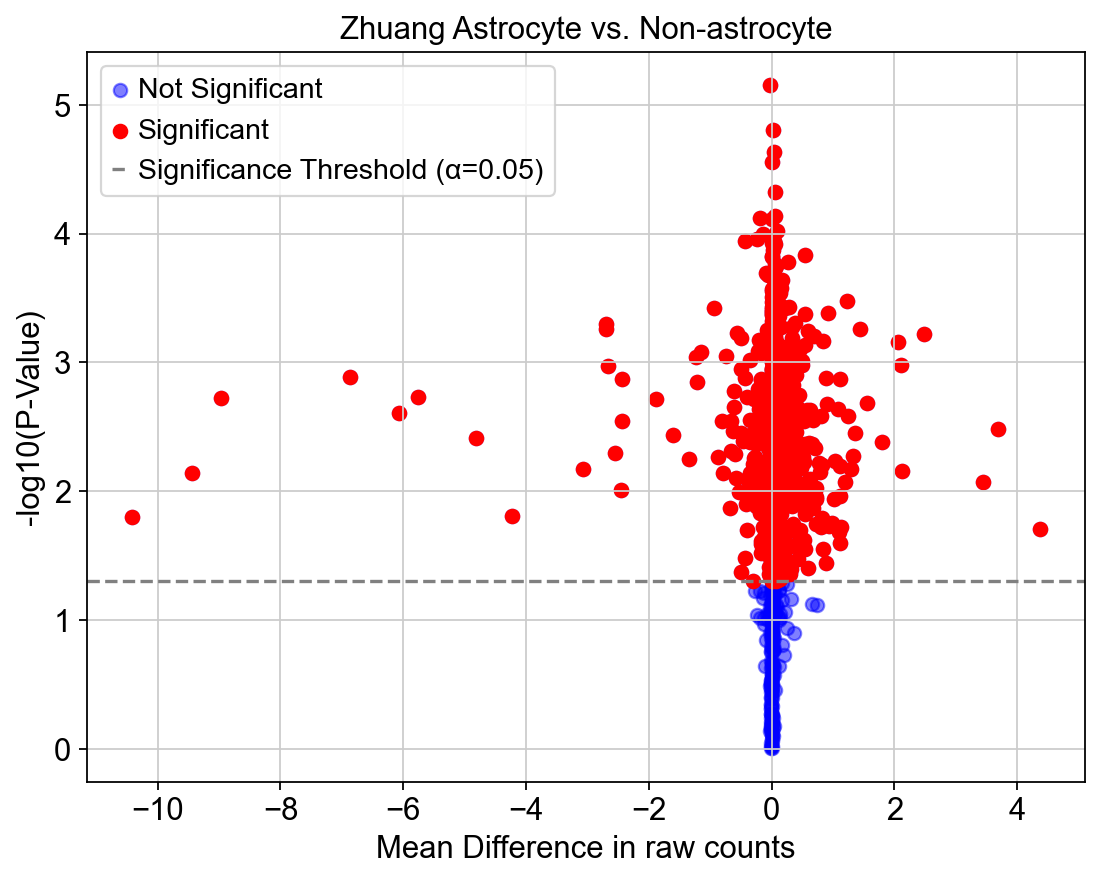

In [126]:
########################## VOLCANO PLOT ##########################
# plot the differences (no absolute value) against the -log10 transformed p-values
plt.figure(figsize=(8, 6))
plt.scatter(average_diff_table_final['Average_Difference'], -np.log10(result_df['P_Value']), color='blue', alpha=0.5, label='Not Significant') # All points initially in blue

# choose a threshold for our p-value
threshold = 0.05
significant_points = result_df['P_Value'] < threshold

# show significant points in red
plt.scatter(average_diff_table_final[significant_points]['Average_Difference'], -np.log10(result_df[significant_points]['P_Value']), color='red', label='Significant') # Significant points in red

plt.xlabel('Mean Difference in raw counts')
plt.ylabel('-log10(P-Value)')
plt.title('Zhuang Astrocyte vs. Non-astrocyte')
plt.axhline(-np.log10(0.05), color='grey', linestyle='--', label='Significance Threshold (α=0.05)')
plt.legend()

plt.show()

In [127]:
# now, instead of largest difference can use our p-values to find the most significant genes from the multiple samples
most_significant_genes = result_df.nsmallest(5, 'P_Value')
most_significant_genes

,Gene,P_Value
398,ENSMUSG00000010461,0.000007
149,ENSMUSG00000031112,0.000016
117,ENSMUSG00000074345,0.000023
1066,ENSMUSG00000051980,0.000028
735,ENSMUSG00000057719,0.000047


In [128]:
########################## GENE MAPPING MATRIX ##########################
gene_matrices = pd.read_csv('gene.csv')
gene_matrices

,gene_identifier,gene_symbol,name,mapped_ncbi_identifier
0,ENSMUSG00000024798,Htr7,5-hydroxytryptamine (serotonin) receptor 7,NCBIGene:15566
1,ENSMUSG00000042385,Gzmk,granzyme K,NCBIGene:14945
2,ENSMUSG00000036198,Arhgap36,Rho GTPase activating protein 36,NCBIGene:75404
3,ENSMUSG00000028780,Sema3c,"sema domain, immunoglobulin domain (Ig), short...",NCBIGene:20348
4,ENSMUSG00000015843,Rxrg,retinoid X receptor gamma,NCBIGene:20183
...,...,...,...,...
1117,ENSMUSG00000015619,Gata3,GATA binding protein 3,NCBIGene:14462
1118,ENSMUSG00000070047,Fat1,FAT atypical cadherin 1,NCBIGene:14107
1119,ENSMUSG00000002266,Zim1,"zinc finger, imprinted 1",NCBIGene:22776
1120,ENSMUSG00000036111,Lmo1,LIM domain only 1,NCBIGene:109594


In [129]:
def get_gene_name(gene_data, gene_identifier):
    gene_row = gene_data[gene_data['gene_identifier'] == gene_identifier]
    if not gene_row.empty:
        return gene_row['name'].values[0]
    else:
        return "Gene for gene_identifier not found"

In [137]:
gene_identifier_to_find = 'ENSMUSG00000010461'
gene_name = get_gene_name(gene_matrices, gene_identifier_to_find)
print(f"Gene for gene_identifier {gene_identifier_to_find} is {gene_name}")

Gene for gene_identifier ENSMUSG00000010461 is EYA transcriptional coactivator and phosphatase 4


In [133]:
gene_identifier_to_find = 'ENSMUSG00000031112'
gene_name = get_gene_name(gene_matrices, gene_identifier_to_find)
print(f"Gene for gene_identifier {gene_identifier_to_find} is {gene_name}")

Gene for gene_identifier ENSMUSG00000031112 is serine/threonine kinase 26


In [134]:
gene_identifier_to_find = 'ENSMUSG00000074345'
gene_name = get_gene_name(gene_matrices, gene_identifier_to_find)
print(f"Gene for gene_identifier {gene_identifier_to_find} is {gene_name}")

Gene for gene_identifier ENSMUSG00000074345 is tumor necrosis factor, alpha-induced protein 8-like 3


In [135]:
gene_identifier_to_find = 'ENSMUSG00000051980'
gene_name = get_gene_name(gene_matrices, gene_identifier_to_find)
print(f"Gene for gene_identifier {gene_identifier_to_find} is {gene_name}")

Gene for gene_identifier ENSMUSG00000051980 is calcium-sensing receptor


In [136]:
gene_identifier_to_find = 'ENSMUSG00000057719'
gene_name = get_gene_name(gene_matrices, gene_identifier_to_find)
print(f"Gene for gene_identifier {gene_identifier_to_find} is {gene_name}")

Gene for gene_identifier ENSMUSG00000057719 is SH3 domain containing ring finger 2


In [131]:
# loop through all of the genes with the lowest p-value according to the volcano plot
i = 0
while i < len(most_significant_genes['Gene']):
    gene_identifier = most_significant_genes.iloc[i,0]  # Assuming gene identifiers are in the first column
    gene_name = get_gene_name(gene_matrices, gene_identifier)
    print(f"Gene at position {i+1}: {gene_name}")
    i+=1

Gene at position 1: EYA transcriptional coactivator and phosphatase 4
Gene at position 2: serine/threonine kinase 26
Gene at position 3: tumor necrosis factor, alpha-induced protein 8-like 3
Gene at position 4: calcium-sensing receptor
Gene at position 5: SH3 domain containing ring finger 2


In [149]:
significant_genes = p_values_df[p_values_df['p_value'] < 0.05]
significant_genes.to_csv('significant_genes.txt', sep='\t', index=False)

In [148]:
significant_genes

,Gene,p_value
0,ENSMUSG00000024798,0.000659
1,ENSMUSG00000042385,0.000165
2,ENSMUSG00000036198,0.026340
3,ENSMUSG00000028780,0.001246
4,ENSMUSG00000015843,0.000062
...,...,...
1112,ENSMUSG00000024064,0.002409
1113,ENSMUSG00000035580,0.001958
1114,ENSMUSG00000010136,0.006160
1116,ENSMUSG00000022324,0.001011
